# The Notebook aims to perform Exploratory Data Analysis and Model Training

**Loading the cleaned data**

In [1]:
import pandas as pd
import random
random.seed(1)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
brfss = pd.read_csv("brfssCleaned.csv")

In [3]:
brfss.head()

,HeartDiseaseorAttack,HighBP,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,Diabetes,PhysicalActivity,Fruits,...,Sex,Age,Education,Income,AnyHealthcare,Asthama,SkinCancer,Race,KidneyDisease,Obese
0,0.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,1.0,...,0.0,7.0,4.0,6.0,1.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,27.0,1.0,1.0,0.0,1.0,0.0,...,0.0,7.0,5.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,0.0,9.0,6.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,8.0,6.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,1.0,...,0.0,8.0,5.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0


###### check shape of the dataset (rows and columns)


In [4]:
brfss.shape

(39452, 27)

In [5]:
brfss.describe().style.background_gradient()

,HeartDiseaseorAttack,HighBP,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,Diabetes,PhysicalActivity,Fruits,Veggies,HeavyAlcoholConsump,NoDocbcozCost,GeneralHealth,MentalHealth,PhysicalHlth,DifficultyWalk,Sex,Age,Education,Income,AnyHealthcare,Asthama,SkinCancer,Race,KidneyDisease,Obese
count,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000,39452.000000
mean,0.034320,0.288021,0.291519,0.946771,28.999797,0.378891,0.019340,0.245818,0.824318,0.600020,0.841782,0.076701,0.084913,2.318083,4.574445,3.047399,0.093633,0.469735,5.937595,5.169066,7.265563,0.939243,0.143668,0.048971,1.798768,0.017566,0.716592
std,0.182053,0.452847,0.454468,0.224493,6.604942,0.485117,0.137719,0.656673,0.380554,0.489900,0.364950,0.266119,0.278756,0.978636,8.240926,7.310620,0.291321,0.499090,2.359506,0.928379,2.352332,0.238888,0.350757,0.215810,1.521365,0.131368,0.450658
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,5.000000,2.000000,0.000000,1.000000,8.000000,6.000000,9.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,9.000000,6.000000,11.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000


#### The Correlation of the data

<AxesSubplot:>

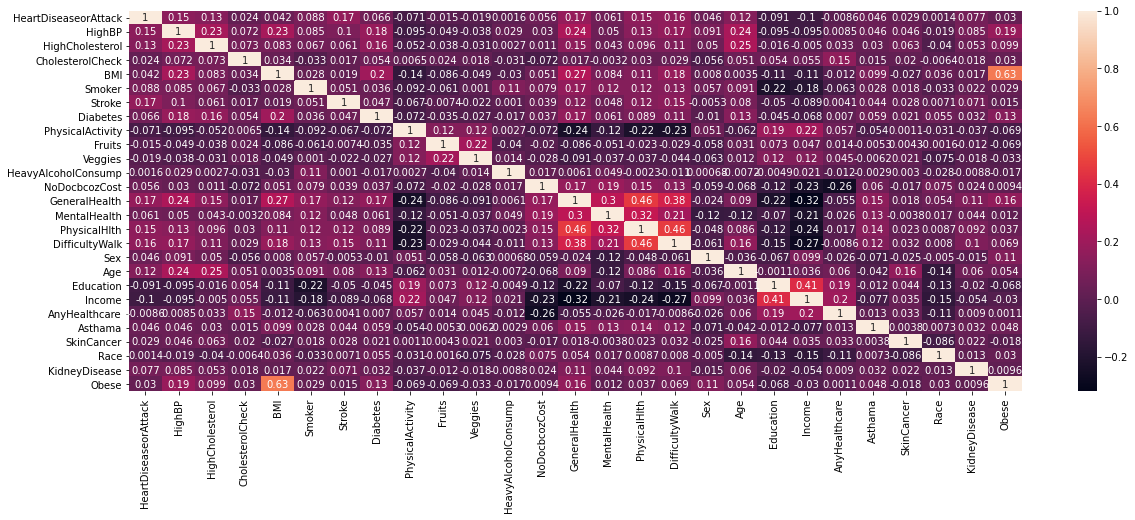

In [6]:
correlation= brfss.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

#### The percentage of patients that have heart disease ?


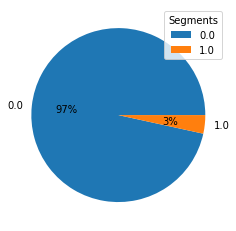

In [7]:
plt.pie(brfss.HeartDiseaseorAttack.value_counts(), labels=brfss.HeartDiseaseorAttack.value_counts().index,autopct='%.0f%%')
plt.legend(title='Segments')

plt.show()

#### The age of patients ?

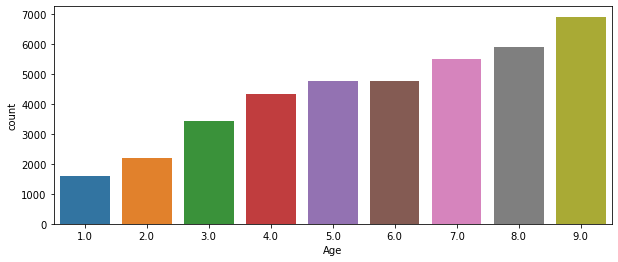

In [8]:
plt.figure(figsize=(10,4))

sns.countplot(x = brfss.Age.sort_values())
plt.style.context('ggplot')

#### How many patients that have heart disease are smoking ?


<AxesSubplot:xlabel='Smoker', ylabel='count'>

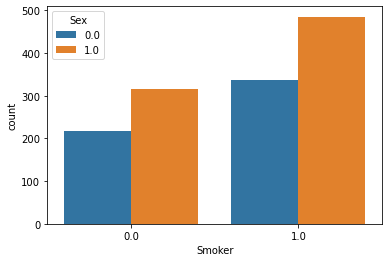

In [9]:
have_heart_dis=brfss[brfss['HeartDiseaseorAttack'] == 1]
sns.countplot(x = have_heart_dis.Smoker ,hue=have_heart_dis.Sex)


#### The age and gender of patient that have heart disease

<AxesSubplot:xlabel='Age', ylabel='count'>

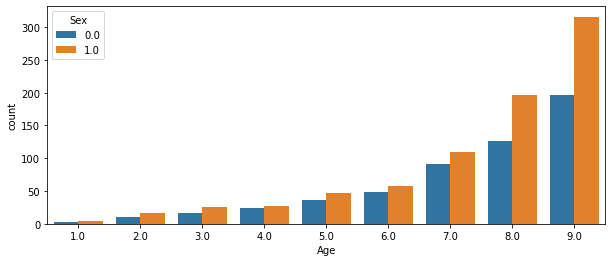

In [10]:
plt.figure(figsize=(10,4))

sns.countplot(x = have_heart_dis.Age.sort_values() ,hue=have_heart_dis.Sex)


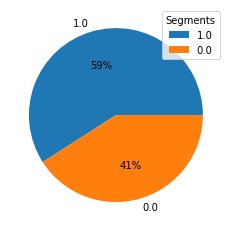

In [11]:
plt.pie(have_heart_dis.Sex.value_counts(), labels=have_heart_dis.Sex.value_counts().index,autopct='%.0f%%')
plt.legend(title='Segments')

plt.show()

59% of patients that have heart disease are males, 41% are females and the most age that have heart disease are start from 60 to older


#### What is the general health of people that have heart disease

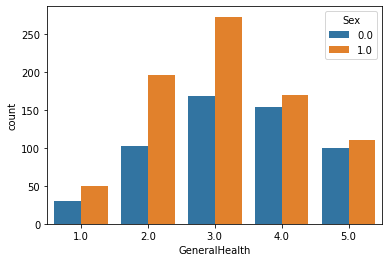

In [12]:
sns.countplot(x = have_heart_dis.GeneralHealth ,hue=have_heart_dis.Sex)
plt.style.use('ggplot')

In [13]:
pd.DataFrame(have_heart_dis.GeneralHealth.value_counts()/len(have_heart_dis.GeneralHealth)*100)


,GeneralHealth
3.0,32.570162
4.0,23.929099
2.0,22.008863
5.0,15.583456
1.0,5.908419


 1(Excellent)- 5.9% , 2(Very good) - 22.008863%, 3(Good)-32.6% , 5(Poor)-15.6%
 
 

<AxesSubplot:xlabel='Diabetes', ylabel='BMI'>

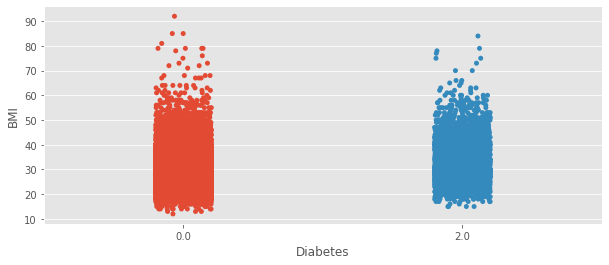

In [14]:
plt.figure(figsize=(10,4))

sns.stripplot(y = brfss.BMI,x = brfss.Diabetes)

#### what is the median of the mental health ?

In [15]:
pd.DataFrame(brfss.MentalHealth.describe())


,MentalHealth
count,39452.000000
mean,4.574445
std,8.240926
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,30.000000


##### Check how many respondents have had heart disease or a heart attack. Note the class imbalance.


In [16]:
 brfss.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    38098
1.0     1354
dtype: int64

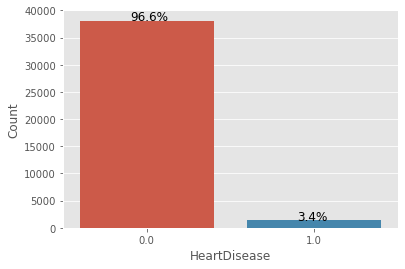

In [17]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=brfss["HeartDiseaseorAttack"])
plt.xlabel('HeartDisease')
plt.ylabel('Count')
total = len(brfss)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), size=12)
plt.show()

### The dataset is imbalanced.When the dataset is imbalanced, the machine learning algorithm may be biased towards the majority class and struggle to accurately classify examples from the minority class.This can lead to poor performance and low accuracy.

**Creating a second dataset with a 50-50 balance for the HeartDiseaseorAttack response variable - just to compare performance.**

##### Take a random sample of 1354 instances of the 0 (or No heart Disease / Attack) and all of the 1354 instances of the 1 (or Yes Heart Disease / Attack).

In [18]:
#Separate the 0 and 1

#Get the 1s
is1 = brfss['HeartDiseaseorAttack'] == 1
brfss_5050_1 = brfss[is1]

#Get the 0s
is0 = brfss['HeartDiseaseorAttack'] == 0
brfss_5050_0 = brfss[is0] 

#Select the 1354 random cases for 0
brfss_5050_0_rand1 = brfss_5050_0.take(np.random.permutation(len(brfss_5050_0))[:1354])

In [19]:
#Append the 1354 1s to the 1354 randomly selected 0s
brfss_5050 = brfss_5050_0_rand1.append(brfss_5050_1, ignore_index = True)

In [20]:
#Check that it worked. Now we have a dataset of 2708 rows that is equally balanced with 50% 1 and 50% 0 for the target variable HeartDiseaseorAttack
brfss_5050

,HeartDiseaseorAttack,HighBP,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,Diabetes,PhysicalActivity,Fruits,...,Sex,Age,Education,Income,AnyHealthcare,Asthama,SkinCancer,Race,KidneyDisease,Obese
0,0.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,6.0,6.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,...,0.0,5.0,6.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,4.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,7.0,5.0,4.0,1.0,0.0,0.0,4.0,0.0,1.0
4,0.0,0.0,0.0,0.0,28.0,0.0,0.0,2.0,1.0,0.0,...,1.0,3.0,6.0,9.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,0.0,7.0,5.0,10.0,1.0,0.0,0.0,2.0,0.0,1.0
2704,1.0,1.0,0.0,1.0,34.0,0.0,0.0,2.0,1.0,1.0,...,1.0,7.0,4.0,1.0,0.0,0.0,0.0,5.0,0.0,1.0
2705,1.0,0.0,1.0,0.0,35.0,1.0,0.0,0.0,1.0,0.0,...,1.0,9.0,5.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0
2706,1.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,6.0,1.0,0.0,0.0,2.0,0.0,0.0


In [21]:
 brfss_5050.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    1354
1.0    1354
dtype: int64

In [22]:
brfss_5050.to_csv('brfss_5050_cleaned.csv', index=False)

#### Also getting a 60-40 Dataset Randomly Selected


In [23]:
#Also make a 60-40 dataset

brfss_6040_0_rand1 = brfss_5050_0.take(np.random.permutation(len(brfss_5050_0))[:2708])
brfss_6040 = brfss_6040_0_rand1.append(brfss_5050_1, ignore_index = True)


In [24]:
#Save the 6040 balanced dataset to csv

brfss_6040.to_csv('brfss_6040_cleaned.csv', index=False)

brfss_6040

,HeartDiseaseorAttack,HighBP,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,Diabetes,PhysicalActivity,Fruits,...,Sex,Age,Education,Income,AnyHealthcare,Asthama,SkinCancer,Race,KidneyDisease,Obese
0,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,9.0,4.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,6.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,24.0,1.0,1.0,2.0,0.0,0.0,...,0.0,8.0,5.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0
3,0.0,0.0,0.0,1.0,36.0,1.0,0.0,0.0,1.0,0.0,...,0.0,8.0,5.0,9.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,...,0.0,4.0,5.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,1.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,0.0,7.0,5.0,10.0,1.0,0.0,0.0,2.0,0.0,1.0
4058,1.0,1.0,0.0,1.0,34.0,0.0,0.0,2.0,1.0,1.0,...,1.0,7.0,4.0,1.0,0.0,0.0,0.0,5.0,0.0,1.0
4059,1.0,0.0,1.0,0.0,35.0,1.0,0.0,0.0,1.0,0.0,...,1.0,9.0,5.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0
4060,1.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,6.0,1.0,0.0,0.0,2.0,0.0,0.0


# Model Training and Feature Engineering / Selection

### Random Forests

### Random Forest - w/ Feature Selection - Full Dataset
* 10 trees & 50 trees Tested (n_estimator changes)
* RF 10 trees - 5-fold cv 
* RF 50 trees - 5-fold cv 
* RF 50 trees - 10-fold cv 


In [25]:
import sys
import csv
import math
import numpy as np
from operator import itemgetter
import time

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import sklearn.externals as extjoblib
import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale


#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

In [26]:
# Global parameters

target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=0                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection
fs_type=4                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features

#Set global model parameters

#Set Random State variable for randomizing splits on runs
rand_st=1


In [27]:
# Load Data
file1= csv.reader(open('brfssCleaned.csv'))


#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)

# Feature Selection
#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                          #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected:', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)                
        sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==4:
        clf= RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)
        clf.fit(data_np,target_np)
        sel_idx = []
        print('clf.feature_importances_ = ', clf.feature_importances_)
        for x in clf.feature_importances_:
          if x >= np.mean(clf.feature_importances_):
            sel_idx.append(1)
          else:
            sel_idx.append(0)

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
               
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index
    

# Train SciKit Models


print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)  
    clf.fit(data_train,target_train)
    scores_ACC_train = clf.score(data_train, target_train)                                                                                                                          
    print('Random Forest Train Acc:', scores_ACC_train)
    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass   
    scores_recall = classification_report(target_test, clf.predict(data_test), output_dict=True)['1']['recall']
    print('Random Forest Recall:', scores_recall)

####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                                                                                                                                
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)   
    scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)                                                                                                 

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))    
    scores_recall = scores['test_Recall']
    print("Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))                              
    clf.fit(data_train, target_train)
    scores_ACC_val = clf.score(data_test, target_test)
    print("Random Forest Validation Accuracy: ", scores_ACC_val)
    print("CV Runtime:", time.time()-start_ts)

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
39452 39452


--FEATURE SELECTION ON-- 

clf.feature_importances_ =  [0.04487994 0.03636227 0.00564501 0.12530056 0.02634118 0.03085928
 0.01983763 0.02092408 0.02844277 0.01984239 0.01337593 0.01425636
 0.07874538 0.066366   0.06948471 0.02345433 0.02648676 0.08986984
 0.05358926 0.09383945 0.01030146 0.02011409 0.01317963 0.04161245
 0.01175815 0.01513109]
Selected: ['HighBP', 'BMI', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'Age', 'Education', 'Income', 'Race']
Features (total/selected): 26 9


--ML Model Output-- 

Random Forest Accuracy: 0.96 (+/- 0.00)
Random Forest AUC: 0.74 (+/- 0.02)
Random Forest Recal

### Random Forest without Feature selection - Full Dataset
* 10 trees & 50 trees Tested (n_estimator changes)
RF 10 trees - 5-fold cv 
RF 50 trees - 5-fold cv 

In [29]:
# Global parameters


target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=0                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=0                                       #Control Switch for Feature Selection
fs_type=4                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features

#Set global model parameters
rand_st=1       




file1= csv.reader(open('brfssCleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data


# Feature Selection


#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                          #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected:', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        clf = RandomForestClassifier( n_estimators=100, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)                
        sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==4:
        clf= RandomForestClassifier( n_estimators=10, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)
        clf.fit(data_np,target_np)
        sel_idx = []
        print('clf.feature_importances_ = ', clf.feature_importances_)
        for x in clf.feature_importances_:
          if x >= np.mean(clf.feature_importances_):
            sel_idx.append(1)
          else:
            sel_idx.append(0)

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
               
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index
    


# Train SciKit Models

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier( n_estimators=10, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)  
    clf.fit(data_train,target_train)
    
    scores_ACC_train = clf.score(data_train, target_train)                                                                                                                          
    print('Random Forest Train Acc:', scores_ACC_train)
    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass   
    scores_recall = classification_report(target_test, clf.predict(data_test), output_dict=True)['1']['recall']
    print('Random Forest Recall:', scores_recall)                                                                   #AUC only works with binary classes, not multiclass            
 
####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier( n_estimators=100, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)   
    scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)                                                                                                 
    
                                    
    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))    
    scores_recall = scores['test_Recall']
    print("Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))                              
    clf.fit(data_train, target_train)
    scores_ACC_val = clf.score(data_test, target_test)
    print("Random Forest Validation Accuracy: ", scores_ACC_val)
    print("CV Runtime:", time.time()-start_ts)

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
39452 39452


--ML Model Output-- 

Random Forest Accuracy: 0.97 (+/- 0.00)
Random Forest AUC: 0.81 (+/- 0.02)
Random Forest Recall: 0.01 (+/- 0.02)
Random Forest Validation Accuracy:  0.9642262292707654
CV Runtime: 11.13578987121582


### Random Forest - w/ and w/o Feature Selection - 50-50 Balanced Dataset

In [31]:
# Global parameters

target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=0                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection
fs_type=4                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs


file1= csv.reader(open('brfss_5050_cleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)


# Preprocess data


# Feature Selection


#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                          #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected:', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)                
        sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==4:
        clf= RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)
        clf.fit(data_np,target_np)
        sel_idx = []
        print('clf.feature_importances_ = ', clf.feature_importances_)
        for x in clf.feature_importances_:
          if x >= np.mean(clf.feature_importances_):
            sel_idx.append(1)
          else:
            sel_idx.append(0)

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
               
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index
    


# Train SciKit Models

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)  
    clf.fit(data_train,target_train)
    scores_ACC_train = clf.score(data_train, target_train)                                                                                                                          
    print('Random Forest Train Acc:', scores_ACC_train)
    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass   
    scores_recall = classification_report(target_test, clf.predict(data_test), output_dict=True)['1']['recall']
    print('Random Forest Recall:', scores_recall)                                                                     #AUC only works with binary classes, not multiclass            
 
####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)   
    scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)                                                                                                 

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))    
    scores_recall = scores['test_Recall']
    print("Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))                              
    clf.fit(data_train, target_train)
    scores_ACC_val = clf.score(data_test, target_test)
    print("Random Forest Validation Accuracy: ", scores_ACC_val)
    print("CV Runtime:", time.time() - start_ts)


['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
2708 2708


--FEATURE SELECTION ON-- 

clf.feature_importances_ =  [0.0597266  0.04438211 0.00528868 0.10913207 0.03401118 0.03483987
 0.0192746  0.02031105 0.02459042 0.01966561 0.01214901 0.01337011
 0.08358976 0.0608999  0.05774867 0.03260581 0.02945861 0.10194526
 0.05099067 0.08905568 0.00907666 0.01671527 0.01172367 0.03579556
 0.00849051 0.01516265]
Selected: ['HighBP', 'HighCholesterol', 'BMI', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'Age', 'Education', 'Income']
Features (total/selected): 26 9


--ML Model Output-- 

Random Forest Accuracy: 0.73 (+/- 0.02)
Random Forest AUC: 0.79 (+/- 0.03)
Random For

### Random Forest with feature selection- 60-40 Balanced Dataset
* 10 trees & 50 trees Tested (n_estimator changes)
* RF 10 trees - 5-fold 
* RF 50 trees - 5-fold 
* RF 50 trees w/feat_select - 5-fold 


In [33]:
# Global parameters

target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=0                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection
fs_type=4                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features


#Set global model parameters
rand_st=1       

file1= csv.reader(open('brfss_6040_cleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data

# Feature Selection


#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                          #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected:', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)                
        sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==4:
        clf= RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)
        clf.fit(data_np,target_np)
        sel_idx = []
        print('clf.feature_importances_ = ', clf.feature_importances_)
        for x in clf.feature_importances_:
          if x >= np.mean(clf.feature_importances_):
            sel_idx.append(1)
          else:
            sel_idx.append(0)

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
               
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index
    


# Train SciKit Models

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)  
    clf.fit(data_train,target_train)

    scores_ACC_train = clf.score(data_train, target_train)                                                                                                                          
    print('Random Forest Train Acc:', scores_ACC_train)
    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass   
    scores_recall = classification_report(target_test, clf.predict(data_test), output_dict=True)['1']['recall']
    print('Random Forest Recall:', scores_recall)                                                                   #AUC only works with binary classes, not multiclass            
                                                                    #AUC only works with binary classes, not multiclass            
 
####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier( n_estimators=50, max_depth=None, min_samples_split=3,criterion='entropy', random_state=rand_st)   
    scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)                                                                                                 

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))    
    scores_recall = scores['test_Recall']
    print("Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))                              
    clf.fit(data_train, target_train)
    scores_ACC_val = clf.score(data_test, target_test)
    print("Random Forest Validation Accuracy: ", scores_ACC_val)
    print("CV Runtime:", time.time()-start_ts)

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
4062 4062


--FEATURE SELECTION ON-- 

clf.feature_importances_ =  [0.06899298 0.04446782 0.00585647 0.10829474 0.02908331 0.03207659
 0.01729645 0.0199553  0.02430685 0.01933986 0.01256135 0.0136762
 0.08805449 0.05935992 0.06477071 0.02371316 0.0284861  0.1021478
 0.0505343  0.08468444 0.0096286  0.01739682 0.01159096 0.03938028
 0.00882826 0.01551622]
Selected: ['HighBP', 'HighCholesterol', 'BMI', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'Age', 'Education', 'Income', 'Race']
Features (total/selected): 26 10


--ML Model Output-- 

Random Forest Accuracy: 0.75 (+/- 0.03)
Random Forest AUC: 0.79 (+/- 0.04)
Ran

# AdaBoost, GradientBoost, and Neural Networks

AdaBoost, GradientBoost, and Neural Network - w/o Feature Selection - Full Dataset

In [34]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Global parameters


target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=0                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs



# Load Data


file1= csv.reader(open('brfssCleaned.csv'), delimiter=',', quotechar='"')

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data


if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection


#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this , skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Gradient Boosting - Cross Val
    start_ts=time.time()
    clf=GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Gradient Boosting - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Gradient Boosting - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))  
    scores_Recall = scores['test_Recall']
    print("Gradient Boosting - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score = clf.score(data_test, target_test)
    print("Gradient Boosting Validation Set Score :", val_score)
    print("GB - CV Runtime:", time.time()-start_ts)
    
    


    #SciKit Ada Boosting - Cross Val
    start_ts=time.time()
    clf=AdaBoostClassifier(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Ada Boost - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Ada Boost - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))  
    scores_Recall = scores['test_Recall']
    print("Ada Boost - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_1 = clf.score(data_test, target_test)
    print("Ada Validation Set Score :", val_score_1)
    print("Ada - CV Runtime:", time.time()-start_ts)


    #SciKit Neural Network - Cross Val
    start_ts=time.time()
    clf=MLPClassifier(activation='logistic', solver='adam', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(10,), random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Neural Network - Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Neural Network - AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
    scores_Recall = scores['test_Recall']
    print("Neural Network -  Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_3 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_3)    
    print("NN - CV Runtime:", time.time()-start_ts) 

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
39452 39452


--ML Model Output-- 

Gradient Boosting - Random Forest Acc: 0.97 (+/- 0.00)
Gradient Boosting - Random Forest AUC: 0.84 (+/- 0.02)
Gradient Boosting - Random Forest Recall: 0.04 (+/- 0.01)
Gradient Boosting Validation Set Score : 0.9643710623506409
GB - CV Runtime: 13.393972873687744
Ada Boost - Random Forest Acc: 0.97 (+/- 0.00)
Ada Boost - Random Forest AUC: 0.84 (+/- 0.03)
Ada Boost - Random Forest Recall: 0.02 (+/- 0.01)
Ada Validation Set Score : 0.9644434788905786
Ada - CV Runtime: 8.330075025558472
Neural Network - Acc: 0.97 (+/- 0.00)
Neural Network - AUC: 0.84 (+/- 0.02)
Neural Network -  Recall

# AdaBoost, GradientBoost, and Neural Network - w/ Feature Selection - Full Dataset

In [35]:
# Global parameters


target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1         


# Load Data


file1= csv.reader(open('brfssCleaned.csv'), delimiter=',', quotechar='"')

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data


if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection


#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this , skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Gradient Boosting - Cross Val
    start_ts=time.time()
    clf=GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Gradient Boosting - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Gradient Boosting - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))  
    scores_Recall = scores['test_Recall']
    print("Gradient Boosting - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score = clf.score(data_test, target_test)
    print("Gradient Boosting Validation Set Score :", val_score)
    print("GB - CV Runtime:", time.time()-start_ts)
    
    


    #SciKit Ada Boosting - Cross Val
    start_ts=time.time()
    clf=AdaBoostClassifier(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Ada Boost - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Ada Boost - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))  
    scores_Recall = scores['test_Recall']
    print("Ada Boost - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_1 = clf.score(data_test, target_test)
    print("Ada Validation Set Score :", val_score_1)
    print("Ada - CV Runtime:", time.time()-start_ts)


    #SciKit Neural Network - Cross Val
    start_ts=time.time()
    clf=MLPClassifier(activation='logistic', solver='adam', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(10,), random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Neural Network - Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Neural Network - AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
    scores_Recall = scores['test_Recall']
    print("Neural Network -  Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_3 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_3)    
    print("NN - CV Runtime:", time.time()-start_ts) 

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
39452 39452


--FEATURE SELECTION ON-- 

Wrapper Select: 
Selected ['HighBP', 'HighCholesterol', 'Stroke', 'GeneralHealth', 'DifficultyWalk', 'Age']
Features (total/selected): 26 6


--ML Model Output-- 

Gradient Boosting - Random Forest Acc: 0.97 (+/- 0.00)
Gradient Boosting - Random Forest AUC: 0.83 (+/- 0.02)
Gradient Boosting - Random Forest Recall: 0.03 (+/- 0.02)
Gradient Boosting Validation Set Score : 0.9674125570280252
GB - CV Runtime: 4.460906982421875
Ada Boost - Random Forest Acc: 0.97 (+/- 0.00)
Ada Boost - Random Forest AUC: 0.83 (+/- 0.02)
Ada Boost - Random Forest Recall: 0.03 (+/- 0.01)
Ada Validation

# AdaBoost, GradientBoost, and Neural Network - w/ Feature Selection - 50-50 Dataset

In [36]:
# Global parameters

target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=0                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                  

file1= csv.reader(open('brfss_5050_cleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data

if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this, skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Gradient Boosting - Cross Val
    start_ts=time.time()
    clf=GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Gradient Boosting - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Gradient Boosting - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
    scores_Recall = scores['test_Recall']
    print("Gradient Boosting - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score = clf.score(data_test, target_test)
    print("Gradient Boosting Validation Set Score :", val_score)
    print("GB - CV Runtime:", time.time()-start_ts)


    #SciKit Ada Boosting - Cross Val
    start_ts=time.time()
    clf=AdaBoostClassifier(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Ada Boost - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Ada Boost - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Ada Boost - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_2 = clf.score(data_test, target_test)
    print("Ada Validation Set Score :", val_score_2)
    print("Ada - CV Runtime:", time.time()-start_ts)


    #SciKit Neural Network - Cross Val
    start_ts=time.time()
    clf=MLPClassifier(activation='logistic', solver='adam', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(10,), random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Neural Network - Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Neural Network - AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
    scores_Recall = scores['test_Recall']
    print("Neural Network -  Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_3 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_3)  
    print("NN - CV Runtime:", time.time()-start_ts) 

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
2708 2708


--ML Model Output-- 

Gradient Boosting - Random Forest Acc: 0.77 (+/- 0.04)
Gradient Boosting - Random Forest AUC: 0.84 (+/- 0.04)
Gradient Boosting - Random Forest Recall: 0.76 (+/- 0.07)
Gradient Boosting Set Score : 0.7478902953586498
GB - CV Runtime: 1.144568681716919
Ada Boost - Random Forest Acc: 0.76 (+/- 0.02)
Ada Boost - Random Forest AUC: 0.84 (+/- 0.04)
Ada Boost - Random Forest Recall: 0.74 (+/- 0.06)
Ada Validation Set Score : 0.7637130801687764
Ada - CV Runtime: 0.9812891483306885
Neural Network - Acc: 0.76 (+/- 0.03)
Neural Network - AUC: 0.84 (+/- 0.04)
Neural Network -  Recall: 0.77 (+/- 0

### AdaBoost, GradientBoost, and Neural Network - w/ Feature Selection - 60-40 Dataset

In [38]:
# Global parameters

target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs



file1= csv.reader(open('brfss_6040_cleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data


if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models


print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this homework, skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit Gradient Boosting - Cross Val
    start_ts=time.time()
    clf=GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Gradient Boosting - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Gradient Boosting - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Gradient Boosting - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_2 = clf.score(data_test, target_test)
    print("Gradient Boosting - Validation Set Score :", val_score_2)  
    print("GB - CV Runtime:", time.time()-start_ts)


    #SciKit Ada Boosting - Cross Val
    start_ts=time.time()
    clf=AdaBoostClassifier(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Ada Boost - Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Ada Boost - Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Ada Boost - Random Forest Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_2 = clf.score(data_test, target_test)
    print("Ada Boost Validation Set Score :", val_score_2)  
    print("Ada - CV Runtime:", time.time()-start_ts)


    #SciKit Neural Network - Cross Val
    start_ts=time.time()
    clf=MLPClassifier(activation='logistic', solver='adam', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(10,), random_state=rand_st)
    scores= cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Neural Network - Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Neural Network - AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Neural Network - Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_3 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_3)  
    print("NN - CV Runtime:", time.time()-start_ts) 

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
4062 4062


--FEATURE SELECTION ON-- 

Wrapper Select: 
Selected ['HighBP', 'HighCholesterol', 'Stroke', 'GeneralHealth', 'DifficultyWalk', 'Age']
Features (total/selected): 26 6


--ML Model Output-- 

Gradient Boosting - Random Forest Acc: 0.77 (+/- 0.02)
Gradient Boosting - Random Forest AUC: 0.83 (+/- 0.03)
Gradient Boosting - Random Forest Recall: 0.57 (+/- 0.07)
Gradient Boosting - Validation Set Score : 0.7763713080168776
GB - CV Runtime: 0.642625093460083
Ada Boost - Random Forest Acc: 0.77 (+/- 0.02)
Ada Boost - Random Forest AUC: 0.83 (+/- 0.02)
Ada Boost - Random Forest Recall: 0.50 (+/- 0.09)
Ada Boost Vali

# Support Vector Machines

In [40]:
from sklearn.svm import SVC


# Global parameters


target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs



# Load Data

file1= csv.reader(open('brfss_5050_cleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data

if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models


print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this, skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit RBF - SVM - Cross Val
#    start_ts=time.time()
#    clf=SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=rand_st)
#    scores=cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

#    scores_Acc = scores['test_Accuracy']                                                                                                                                    
#    print("RBF-SVM Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
#    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
#    print("RBF-SVM AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
#    print("RBF-SVM CV Runtime:", time.time()-start_ts)

    #SciKit Linear - SVM - Cross Val
    start_ts=time.time()
    clf=SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st)
    scores=cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Linear-SVM Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Linear-SVM AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Linear-SVM - Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_1 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_1)
    print("Linear-CV Runtime:", time.time()-start_ts)

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
2708 2708


--FEATURE SELECTION ON-- 

Wrapper Select: 
Selected ['HighBP', 'HighCholesterol', 'Smoker', 'Stroke', 'GeneralHealth', 'DifficultyWalk', 'Sex', 'KidneyDisease']
Features (total/selected): 26 8


--ML Model Output-- 

Linear-SVM Acc: 0.75 (+/- 0.04)
Linear-SVM AUC: 0.83 (+/- 0.04)
Linear-SVM - Recall: 0.70 (+/- 0.09)
Neural Network Validation Set Score : 0.7478902953586498
Linear-CV Runtime: 0.9253411293029785


### Full Dataset

In [41]:
from sklearn.svm import SVC


# Global parameters


target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs



# Load Data

file1= csv.reader(open('brfssCleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data

if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models


print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this, skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit RBF - SVM - Cross Val
#    start_ts=time.time()
#    clf=SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=rand_st)
#    scores=cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

#    scores_Acc = scores['test_Accuracy']                                                                                                                                    
#    print("RBF-SVM Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
#    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
#    print("RBF-SVM AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
#    print("RBF-SVM CV Runtime:", time.time()-start_ts)

    #SciKit Linear - SVM - Cross Val
    start_ts=time.time()
    clf=SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st)
    scores=cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Linear-SVM Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Linear-SVM AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Linear-SVM - Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_1 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_1)
    print("Linear-CV Runtime:", time.time()-start_ts)

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
39452 39452


--FEATURE SELECTION ON-- 

Wrapper Select: 
Selected ['HighBP', 'HighCholesterol', 'CholesterolCheck', 'Stroke', 'Obese']
Features (total/selected): 26 5


--ML Model Output-- 

Linear-SVM Acc: 0.97 (+/- 0.00)
Linear-SVM AUC: 0.50 (+/- 0.00)
Linear-SVM - Recall: 0.00 (+/- 0.00)
Neural Network Validation Set Score : 0.9641538127308277
Linear-CV Runtime: 15.18109393119812


### 60-40 dataset

In [42]:
from sklearn.svm import SVC


# Global parameters


target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize target switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection                                                                                   
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)                        
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs



# Load Data

file1= csv.reader(open('brfss_6040_cleaned.csv'))

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)



# Preprocess data

if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

'''if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)'''



# Feature Selection

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select: ')
        if binning==0:
            rgr = '''Unused in this homework'''
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(chi2, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Chi2: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    


# Train SciKit Models


print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if binning==1 and cross_val==0:
    #SciKit
    '''Test/Train split unused in this, skip down to CV section'''
 

                                                                                                                         
 
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'Recall': 'recall'}                                                                                                                
    
    #SciKit RBF - SVM - Cross Val
#    start_ts=time.time()
#    clf=SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=rand_st)
#    scores=cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

#    scores_Acc = scores['test_Accuracy']                                                                                                                                    
#    print("RBF-SVM Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
#    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
#    print("RBF-SVM AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
#    print("RBF-SVM CV Runtime:", time.time()-start_ts)

    #SciKit Linear - SVM - Cross Val
    start_ts=time.time()
    clf=SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st)
    scores=cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Linear-SVM Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    print("Linear-SVM AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
    scores_Recall = scores['test_Recall']
    print("Linear-SVM - Recall: %0.2f (+/- %0.2f)" % (scores_Recall.mean(), scores_Recall.std() * 2))
    clf.fit(data_train, target_train)
    val_pred = clf.predict(data_test)
    val_score_1 = clf.score(data_test, target_test)
    print("Neural Network Validation Set Score :", val_score_1)
    print("Linear-CV Runtime:", time.time()-start_ts)

['HeartDiseaseorAttack', 'HighBP', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysicalActivity', 'Fruits', 'Veggies', 'HeavyAlcoholConsump', 'NoDocbcozCost', 'GeneralHealth', 'MentalHealth', 'PhysicalHlth', 'DifficultyWalk', 'Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'Asthama', 'SkinCancer', 'Race', 'KidneyDisease', 'Obese']
4062 4062


--FEATURE SELECTION ON-- 

Wrapper Select: 
Selected ['HighBP', 'HighCholesterol', 'CholesterolCheck', 'Smoker', 'Stroke', 'GeneralHealth', 'DifficultyWalk', 'Sex', 'Asthama', 'KidneyDisease']
Features (total/selected): 26 10


--ML Model Output-- 

Linear-SVM Acc: 0.77 (+/- 0.02)
Linear-SVM AUC: 0.82 (+/- 0.04)
Linear-SVM - Recall: 0.53 (+/- 0.05)
Neural Network Validation Set Score : 0.7819971870604782
Linear-CV Runtime: 2.133443832397461
